In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train/train.csv")

In [3]:
len(df)

881876

In [4]:
df.columns

Index(['ID', 'Item_ID', 'Datetime', 'Category_3', 'Category_2', 'Category_1',
       'Price', 'Number_Of_Sales'],
      dtype='object')

In [5]:
df.head()

,ID,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
0,30495_20140101,30495,2014-01-01,0,2.0,90,165.123,1
1,30375_20140101,30375,2014-01-01,0,2.0,307,68.666,5
2,30011_20140101,30011,2014-01-01,0,3.0,67,253.314,2
3,30864_20140101,30864,2014-01-01,0,2.0,315,223.122,1
4,30780_20140101,30780,2014-01-01,1,2.0,132,28.750,1


In [6]:
df.count()

ID                 881876
Item_ID            881876
Datetime           881876
Category_3         881876
Category_2         790263
Category_1         881876
Price              881876
Number_Of_Sales    881876
dtype: int64

In [7]:
df["Price"].describe()

count    881876.000000
mean          5.484011
std          22.472598
min           0.030000
25%           0.125000
50%           0.513000
75%           2.070000
max         424.148000
Name: Price, dtype: float64

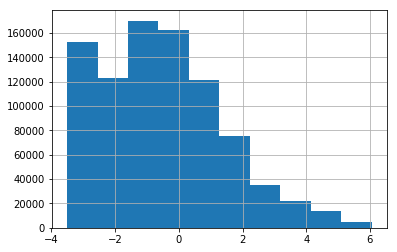

In [8]:
np.log(df["Price"]).hist()

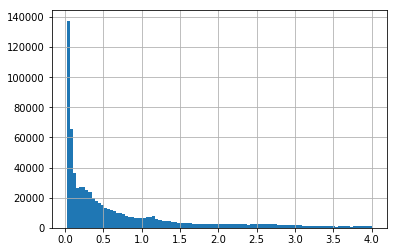

In [9]:
df[df["Price"] < 4.0]["Price"].hist(bins=100)

In [10]:
df["Number_Of_Sales"].describe()

count    881876.000000
mean       1201.021046
std        7750.049731
min           1.000000
25%          69.000000
50%         239.000000
75%         746.000000
max      598054.000000
Name: Number_Of_Sales, dtype: float64

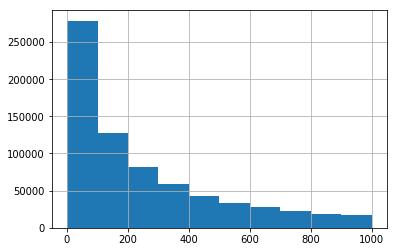

In [11]:
df[df["Number_Of_Sales"] < 1000]["Number_Of_Sales"].hist()

In [12]:
df_item_count_group = pd.DataFrame(df.groupby("Item_ID")["Item_ID"].count())

In [13]:
len(df_item_count_group)

1529

In [14]:
df_item_count_group.columns = ["Count"]

In [15]:
df_item_count_group.head()

,Count
Item_ID,
29654,14
29655,597
29656,539
29657,280
29658,730


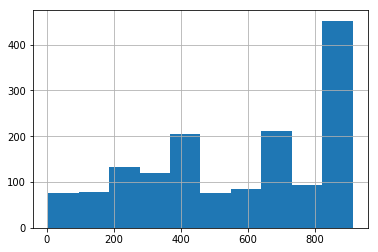

In [16]:
df_item_count_group["Count"].hist()

In [17]:
df_item_price_group = pd.DataFrame(df.groupby("Item_ID")["Price"].aggregate(np.median))

In [18]:
len(df_item_price_group)

1529

In [19]:
df_item_price_group.head()

,Price
Item_ID,
29654,0.8415
29655,10.4990
29656,0.4040
29657,7.6080
29658,0.0940


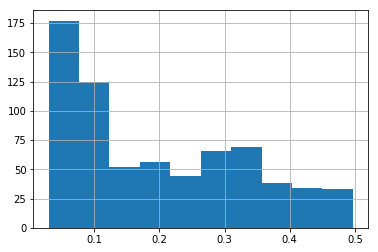

In [20]:
df_item_price_group[df_item_price_group["Price"] < 0.5]["Price"].hist()

In [21]:
df_item_sales_group = pd.DataFrame(df.groupby("Item_ID")["Number_Of_Sales"].aggregate(np.median))

In [22]:
len(df_item_sales_group)

1529

In [23]:
df_item_price_group.head()

,Price
Item_ID,
29654,0.8415
29655,10.4990
29656,0.4040
29657,7.6080
29658,0.0940


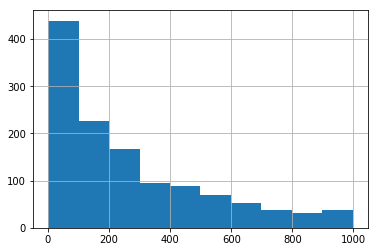

In [24]:
df_item_sales_group[df_item_sales_group["Number_Of_Sales"] < 1000]["Number_Of_Sales"].hist()

In [25]:
df_test = pd.read_csv("test/test.csv")

In [26]:
df_test.head()

,Item_ID,Datetime,Category_1,Category_2,Category_3,ID
0,30413,2016-07-01,235,3.0,0,30413_20160701
1,30413,2016-07-02,235,3.0,0,30413_20160702
2,30413,2016-07-03,235,3.0,0,30413_20160703
3,30413,2016-07-04,235,3.0,0,30413_20160704
4,30413,2016-07-05,235,3.0,0,30413_20160705


In [27]:
df_result = pd.DataFrame()

In [28]:
df_result["ID"] = df_test["ID"]

In [29]:
df_result["Number_Of_Sales"] = df_test["Item_ID"].apply(lambda x: df_item_sales_group.ix[x])

In [30]:
df_result["Price"] = df_test["Item_ID"].apply(lambda x: df_item_price_group.ix[x])

In [31]:
df_result.tail()

,ID,Number_Of_Sales,Price
266243,31301_20161227,1.0,36.713
266244,31301_20161228,1.0,36.713
266245,31301_20161229,1.0,36.713
266246,31301_20161230,1.0,36.713
266247,31301_20161231,1.0,36.713


In [32]:
df_result.head()

,ID,Number_Of_Sales,Price
0,30413_20160701,3.0,171.7225
1,30413_20160702,3.0,171.7225
2,30413_20160703,3.0,171.7225
3,30413_20160704,3.0,171.7225
4,30413_20160705,3.0,171.7225


In [33]:
df_result.to_csv("out.csv", index=False)

In [34]:
df['Datetime'].tail()

881871    2016-06-30
881872    2016-06-30
881873    2016-06-30
881874    2016-06-30
881875    2016-06-30
Name: Datetime, dtype: object

In [35]:
df['Datetime'].head()

0    2014-01-01
1    2014-01-01
2    2014-01-01
3    2014-01-01
4    2014-01-01
Name: Datetime, dtype: object

In [36]:
df['RealDateTime'] = pd.to_datetime(df['Datetime'])

In [37]:
df['RealDateTime'].tail()

881871   2016-06-30
881872   2016-06-30
881873   2016-06-30
881874   2016-06-30
881875   2016-06-30
Name: RealDateTime, dtype: datetime64[ns]

In [38]:
df['RealDateTime'].head().dt.year

0    2014
1    2014
2    2014
3    2014
4    2014
Name: RealDateTime, dtype: int64

In [39]:
df['year'] = df['RealDateTime'].dt.year

In [40]:
pd.DatetimeIndex(df['RealDateTime']).days_in_month

array([31, 31, 31, ..., 30, 30, 30])

In [41]:
price_time_series = pd.Series(list(df['Price']), index=pd.DatetimeIndex(df['RealDateTime']))

In [42]:
price_time_series.head()

RealDateTime
2014-01-01    165.123
2014-01-01     68.666
2014-01-01    253.314
2014-01-01    223.122
2014-01-01     28.750
dtype: float64

In [57]:
pc_year = price_time_series.resample("Q")

C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


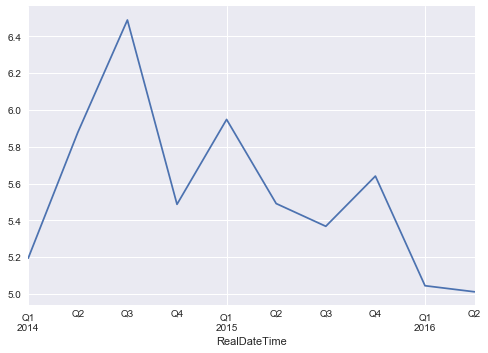

In [58]:
pc_year.plot()

In [59]:
pc_year = price_time_series.resample("M")

In [61]:
pc_year.head()

C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


RealDateTime
2014-01-31    4.414680
2014-02-28    4.801413
2014-03-31    6.132268
2014-04-30    6.548365
2014-05-31    6.078788
Freq: M, dtype: float64

C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


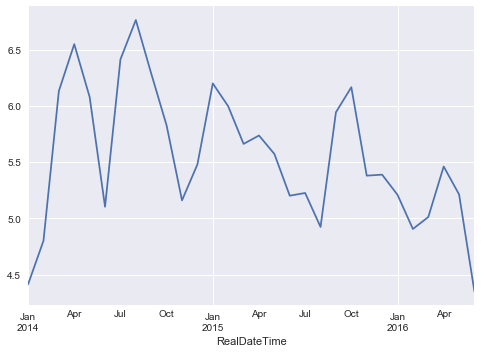

In [60]:
pc_year.plot()

In [63]:
df_test.head()

,Item_ID,Datetime,Category_1,Category_2,Category_3,ID
0,30413,2016-07-01,235,3.0,0,30413_20160701
1,30413,2016-07-02,235,3.0,0,30413_20160702
2,30413,2016-07-03,235,3.0,0,30413_20160703
3,30413,2016-07-04,235,3.0,0,30413_20160704
4,30413,2016-07-05,235,3.0,0,30413_20160705


In [64]:
df_test.tail()

,Item_ID,Datetime,Category_1,Category_2,Category_3,ID
266243,31301,2016-12-27,250,1.0,0,31301_20161227
266244,31301,2016-12-28,250,1.0,0,31301_20161228
266245,31301,2016-12-29,250,1.0,0,31301_20161229
266246,31301,2016-12-30,250,1.0,0,31301_20161230
266247,31301,2016-12-31,250,1.0,0,31301_20161231


In [65]:
from statsmodels.tsa.stattools import adfuller

In [68]:
def test_stationarity(timeseries):   
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=4)
    rolstd = pd.rolling_std(timeseries, window=142)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\pandas\stats\moments.py:216: FutureWarning: 
.resample() is now a deferred operation
You called rolling(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  r = getattr(arg, dispatch)(**kwargs)
C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for DatetimeIndexResampler and will be removed in a future version, replace with 
	DatetimeIndexResampler.rolling(center=False,window=4).mean()
  app.launch_new_instance()
C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_std is deprecated for DatetimeIndexResampler and will be removed in a future version, replace with 
	DatetimeIndexResampler.rolling(center=False,window=142).std()
C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\matplotlib\cbook.py:2540: FutureWa

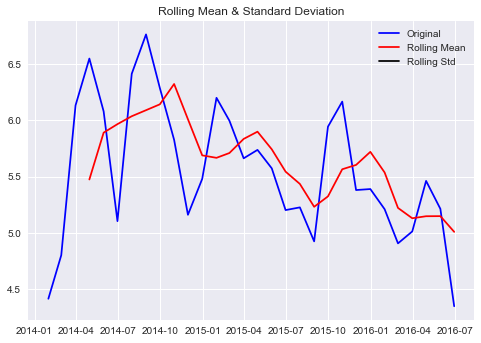

Results of Dickey-Fuller Test:


C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\numpy\core\numeric.py:531: FutureWarning: 
.resample() is now a deferred operation
You called __array_struct__(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  return array(a, dtype, copy=False, order=order)


Test Statistic                 -0.292408
p-value                         0.926573
#Lags Used                      4.000000
Number of Observations Used    25.000000
Critical Value (10%)           -2.632800
Critical Value (5%)            -2.986489
Critical Value (1%)            -3.723863
dtype: float64


C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\numpy\core\numeric.py:531: FutureWarning: 
.resample() is now a deferred operation
You called __array_interface__(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  return array(a, dtype, copy=False, order=order)
C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\numpy\core\numeric.py:531: FutureWarning: 
.resample() is now a deferred operation
You called __array__(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  return array(a, dtype, copy=False, order=order)


In [69]:
test_stationarity(pc_year)

C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\pandas\stats\moments.py:216: FutureWarning: 
.resample() is now a deferred operation
You called rolling(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  r = getattr(arg, dispatch)(**kwargs)
C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DatetimeIndexResampler and will be removed in a future version, replace with 
	DatetimeIndexResampler.rolling(center=False,window=3).mean()
  if __name__ == '__main__':
C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\matplotlib\cbook.py:2540: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  return y.index.values, y.values
C:\Users\Atul\Anaconda3\envs\carnd-term1\l

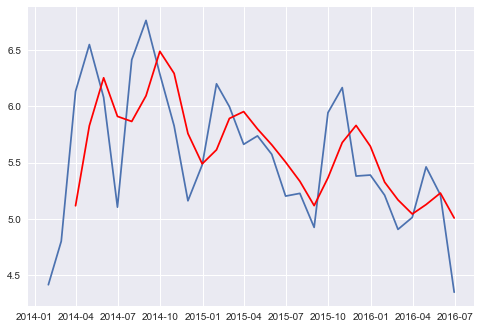

In [70]:
moving_avg = pd.rolling_mean(pc_year, 3)
plt.plot(pc_year)
plt.plot(moving_avg, color='red')

In [71]:
ts_log_moving_avg_diff = pc_year - moving_avg
ts_log_moving_avg_diff.head(5)

C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called __sub__(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


RealDateTime
2014-01-31         NaN
2014-02-28         NaN
2014-03-31    1.016148
2014-04-30    0.721017
2014-05-31   -0.174352
Freq: M, dtype: float64

C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=4).mean()
  app.launch_new_instance()
C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=142).std()


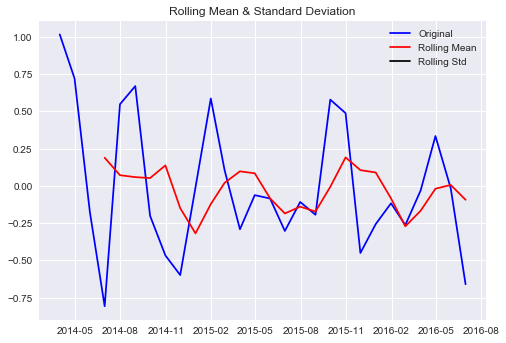

Results of Dickey-Fuller Test:
Test Statistic                 -3.271774
p-value                         0.016188
#Lags Used                      3.000000
Number of Observations Used    24.000000
Critical Value (10%)           -2.635747
Critical Value (5%)            -2.992216
Critical Value (1%)            -3.737709
dtype: float64


In [72]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [73]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_moving_avg_diff, nlags=20)
lag_pacf = pacf(ts_log_moving_avg_diff, nlags=20, method='ols')

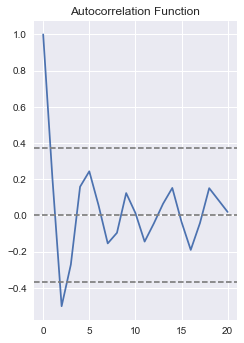

In [75]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


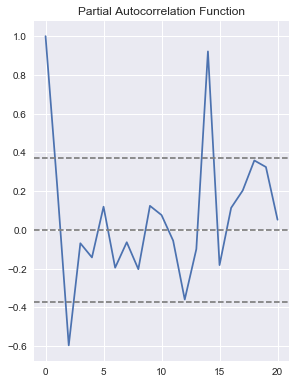

In [76]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [77]:
from statsmodels.tsa.arima_model import ARIMA

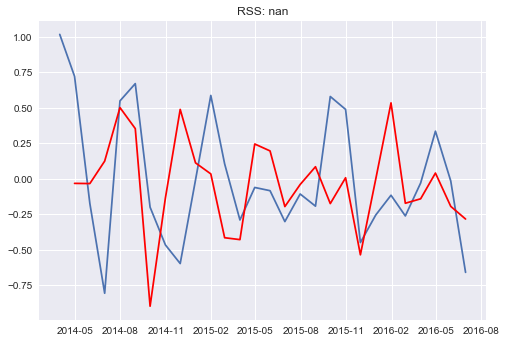

In [79]:
model = ARIMA(ts_log_moving_avg_diff, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_moving_avg_diff)**2))

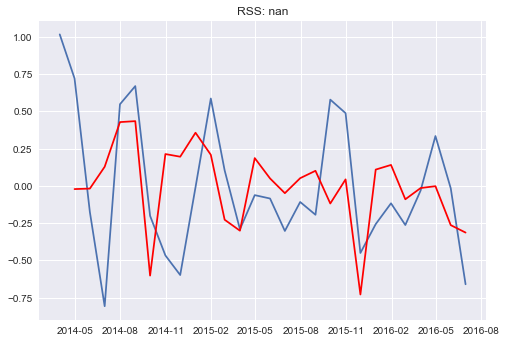

In [80]:
model = ARIMA(ts_log_moving_avg_diff, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_moving_avg_diff)**2))

C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


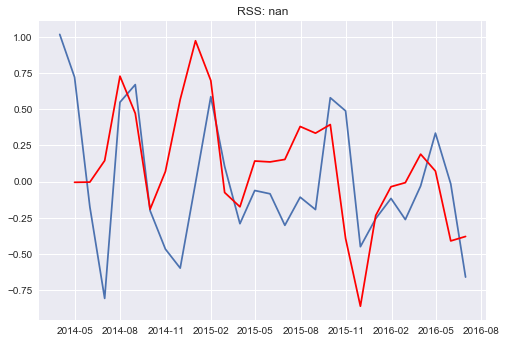

In [81]:
model = ARIMA(ts_log_moving_avg_diff, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_moving_avg_diff)**2))

In [101]:
df_item_price_group_2016 = pd.DataFrame(df.loc[(df.RealDateTime.dt.year == 2015) | (df.RealDateTime.dt.year == 2016)].groupby("Item_ID")["Price"].aggregate(np.median))

In [102]:
df_result = pd.DataFrame()
df_result["ID"] = df_test["ID"]
df_result["Number_Of_Sales"] = df_test["Item_ID"].apply(lambda x: df_item_sales_group.ix[x])
df_result["Price"] = df_test["Item_ID"].apply(lambda x: df_item_price_group_2016.ix[x])
df_result.to_csv("out.csv", index=False)

In [103]:
df_test.tail()

,Item_ID,Datetime,Category_1,Category_2,Category_3,ID
266243,31301,2016-12-27,250,1.0,0,31301_20161227
266244,31301,2016-12-28,250,1.0,0,31301_20161228
266245,31301,2016-12-29,250,1.0,0,31301_20161229
266246,31301,2016-12-30,250,1.0,0,31301_20161230
266247,31301,2016-12-31,250,1.0,0,31301_20161231


In [104]:
Sales_time_series = pd.Series(list(df['Number_Of_Sales']), index=pd.DatetimeIndex(df['RealDateTime']))

In [106]:
sales_year = Sales_time_series.resample("M")

C:\Users\Atul\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


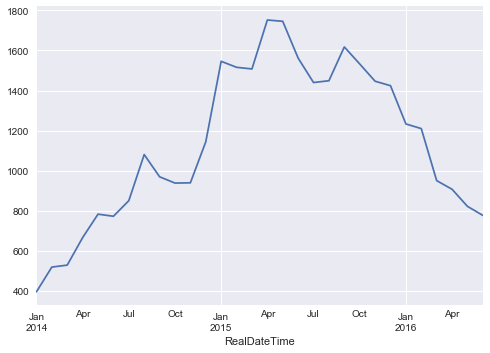

In [107]:
sales_year.plot()

In [112]:
df_item_sales_group_2016 = pd.DataFrame(df.loc[(df.RealDateTime.dt.year == 2014) | (df.RealDateTime.dt.year == 2016)].groupby("Item_ID")["Number_Of_Sales"].aggregate(np.median))

In [113]:
df_result = pd.DataFrame()
df_result["ID"] = df_test["ID"]
df_result["Number_Of_Sales"] = df_test["Item_ID"].apply(lambda x: df_item_sales_group_2016.ix[x])
df_result["Price"] = df_test["Item_ID"].apply(lambda x: df_item_price_group_2016.ix[x])
df_result.to_csv("out.csv", index=False)

In [173]:
df['Category_2'].count()

790263

In [174]:
len(df)

790263

In [167]:
df_category_sales_group = pd.DataFrame(df.groupby("Category_2")["Number_Of_Sales"].aggregate(np.median))

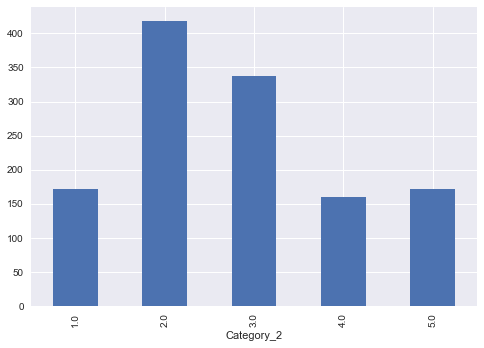

In [168]:
df_category_sales_group["Number_Of_Sales"].plot(kind='bar')

In [172]:
df.dropna(subset=["Category_2"], inplace=True)

In [175]:
df_item_category_sales_group_2016 = pd.DataFrame(df.loc[(df.RealDateTime.dt.year == 2014) | (df.RealDateTime.dt.year == 2016)].groupby(["Item_ID", "Category_2"])["Number_Of_Sales"].aggregate(np.median))

In [ ]:
df_item_category_sales_group_2016 = pd.DataFrame(df.loc[(df.RealDateTime.dt.year == 2014) | (df.RealDateTime.dt.year == 2016)].groupby(["Item_ID", "Category_2"])["Number_Of_Sales"].aggregate(np.median))

In [176]:
df_item_category_sales_group_2016.head()

,,Number_Of_Sales
Item_ID,Category_2,
29654,2.0,292.0
29655,3.0,122.0
29656,3.0,631.0
29658,3.0,2370.0
29661,2.0,360.5


In [178]:
df_result = pd.DataFrame()
df_result["ID"] = df_test["ID"]
df_result["Number_Of_Sales"] = df_test.apply(lambda row: (df_item_category_sales_group_2016.ix[(row['Item_ID'], row['Category_2'])]), axis=1)
df_result["Price"] = df_test["Item_ID"].apply(lambda x: df_item_price_group_2016.ix[x])
df_result.to_csv("out.csv", index=False)

KeyError: (30801, 'occurred at index 184')

In [158]:
df_item_category_sales_group_2016.ix[(29656, 212)]

Number_Of_Sales    631.0
Name: (29656, 212), dtype: float64